<a href="https://colab.research.google.com/github/Tanuka-Mondal/Fuzzy/blob/main/fuzzy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 25.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=04b08d274669a7265f0704073dda2c0d571ed8ee32bc1ccc253d67aa1113a4b8
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [3]:
import matplotlib.pyplot as plt

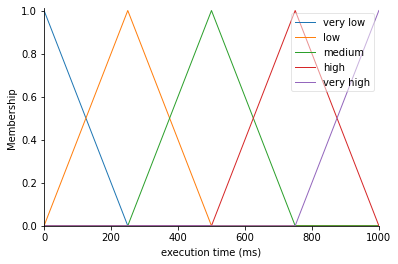

In [4]:
ei = ctrl.Antecedent(np.arange(0,1001,1),'execution time (ms)')
names = ['very low','low','medium','high','very high']
ei.automf(names = names)
ei.view()

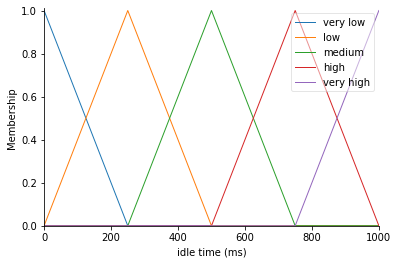

In [5]:
Ii = ctrl.Antecedent(np.arange(0,1001,1),'idle time (ms)')
names = ['very low','low','medium','high','very high']
Ii.automf(names = names)
Ii.view()

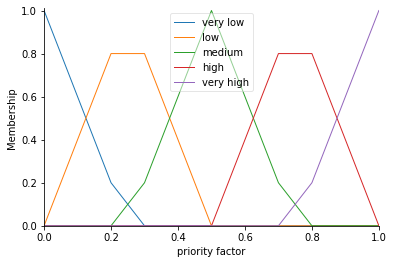

In [6]:
pi = ctrl.Antecedent(np.arange(0,1.1,0.1),'priority factor')
names = ['very low','low','medium','high','very high']
pi.automf(names = names)
pi.view()

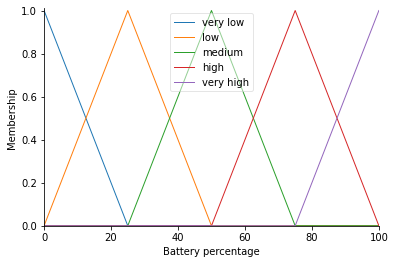

In [7]:
bi = ctrl.Antecedent(np.arange(0,101,1),'Battery percentage')
names = ['very low','low','medium','high','very high']
bi.automf(names = names)
bi.view()

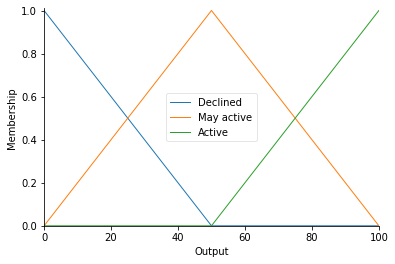

In [8]:
si = ctrl.Consequent(np.arange(0,101,1),'Output')
names = ['Declined','May active','Active']
si.automf(names = names)
si.view()

In [ ]:
rule1 = ctrl.Rule(ei['very low'] & Ii['very high'] & pi['very high'] & bi['very high'],si['Active'])
rule2 = ctrl.Rule(ei['very high'] & Ii['very low'] & pi['very low'] & bi['very low'],si['Declined'])
rule3 = ctrl.Rule(ei['medium'] & Ii['medium'] & pi['medium'] & bi['medium'],si['May active'])
rule4 = ctrl.Rule(ei['very high'] & Ii['very low'] & pi['low'] & bi['medium'],si['Declined'])
rule5 = ctrl.Rule(pi['low'] | bi['low'], si['May active'])

In [25]:
rule1 = ctrl.Rule(ei['very low'],si['Active'])
rule2 = ctrl.Rule(ei['low'],si['Active'])
rule3 = ctrl.Rule(ei['medium'],si['May active'])
rule4 = ctrl.Rule(ei['high'],si['Declined'])
rule5 = ctrl.Rule(ei['very high'],si['Declined'])
rule6 = ctrl.Rule(Ii['very low'] ,si['Declined'])
rule7 = ctrl.Rule(Ii['low'] ,si['Declined'])
rule8 = ctrl.Rule(Ii['medium'] ,si['May active'])
rule9 = ctrl.Rule(Ii['high'],si['Active'])
rule10 = ctrl.Rule(Ii['very high'],si['Active'])
rule11 = ctrl.Rule(pi['very low'] ,si['Declined'])
rule12 = ctrl.Rule(pi['low'] ,si['Declined'])
rule13 = ctrl.Rule(pi['medium'] ,si['May active'])
rule14 = ctrl.Rule(pi['high'],si['Active'])
rule15 = ctrl.Rule(pi['very high'],si['Active'])
rule16 = ctrl.Rule(bi['very low'] ,si['Declined'])
rule17 = ctrl.Rule(bi['low'] ,si['Declined'])
rule18 = ctrl.Rule(bi['medium'] ,si['May active'])
rule19 = ctrl.Rule(bi['high'],si['Active'])
rule20 = ctrl.Rule(bi['very high'],si['Active'])
rule21 = ctrl.Rule(ei['low'] & Ii['very low'],si['Declined'])
rule22 = ctrl.Rule(ei['medium'] & (Ii['very low'] | Ii['low']),si['Declined'])
rule23 = ctrl.Rule(ei['high'] & (Ii['very low'] | Ii['low'] | Ii['medium']),si['Declined'])
rule24 = ctrl.Rule(ei['very high'] & (Ii['very low'] | Ii['low'] | Ii['medium'] | Ii['high']),si['Declined'])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f218c949150>)

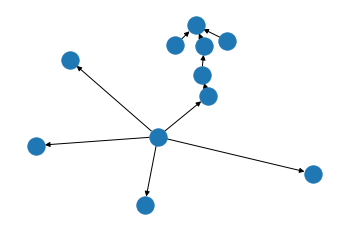

In [10]:
rule1.view()

In [26]:
op = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24])
Sensor = ctrl.ControlSystemSimulation(op)

In [27]:
def SensorOutput():
  Sensor.input['execution time (ms)'] = float(input("execution time: "))
  Sensor.input['idle time (ms)'] = float(input("idle time: "))
  Sensor.input['priority factor'] = float(input("priority factor: "))
  Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  si.view(sim=Sensor)

execution time: 100
idle time: 900
priority factor: 0.9
battery percentage: 95
chance of activation of sensor: 82.7778%


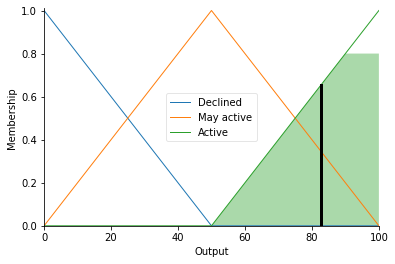

In [28]:
SensorOutput()

execution time: 100
idle time: 900
priority factor: 0.9
battery percentage: 95
chance of activation of sensor: 82.7778%


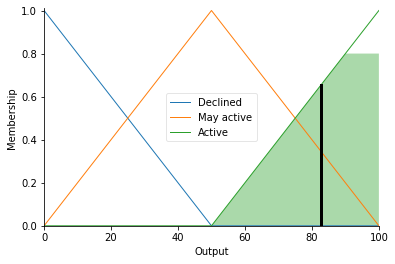

In [14]:
SensorOutput()

execution time: 500
idle time: 480
priority factor: 0.5
battery percentage: 52
chance of activation of sensor: 50%


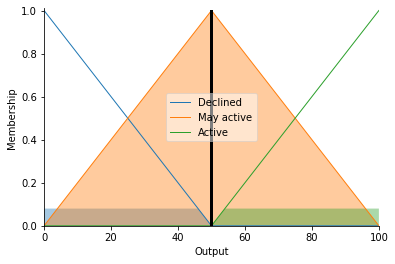

In [15]:
SensorOutput()

execution time: 500
idle time: 200
priority factor: 0.7
battery percentage: 35
chance of activation of sensor: 50%


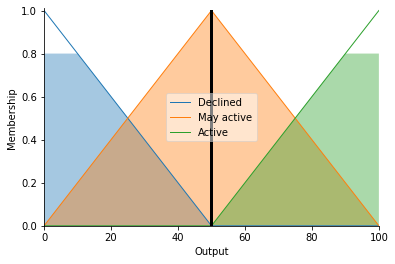

In [16]:
SensorOutput()

execution time: 800
idle time: 750
priority factor: 0.2
battery percentage: 20
chance of activation of sensor: 50.9524%


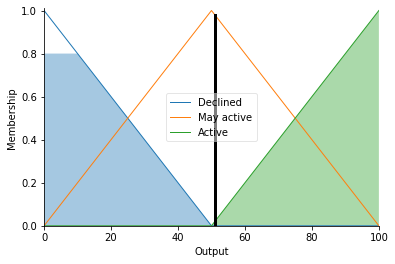

In [17]:
SensorOutput()

execution time: 500
idle time: 200
priority factor: 0.7
battery percentage: 35
chance of activation of sensor: 50%


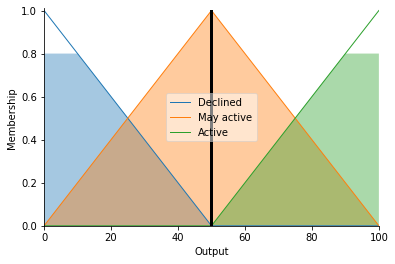

In [22]:
SensorOutput()

execution time: 500
idle time: 200
priority factor: 0.2
battery percentage: 35
chance of activation of sensor: 42.29%


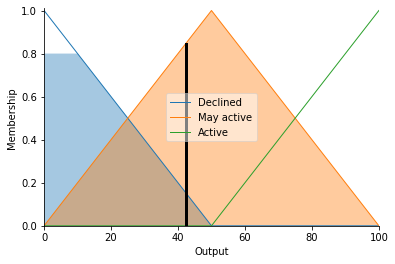

In [23]:
SensorOutput()